In [2]:
import requests
from bs4 import BeautifulSoup

In [4]:
url = "https://www.tepco.co.jp/forecast/html/images/juyo-2020.csv"

In [6]:
response = requests.get(url)

In [7]:
response.text

'2021/4/5 5:40 UPDATE\r\n\r\nDATE,TIME,\x8eÀ\x90Ñ(\x96\x9ckW)\r\n2020/1/1,0:00,2857\r\n2020/1/1,1:00,2703\r\n2020/1/1,2:00,2602\r\n2020/1/1,3:00,2520\r\n2020/1/1,4:00,2464\r\n2020/1/1,5:00,2469\r\n2020/1/1,6:00,2585\r\n2020/1/1,7:00,2763\r\n2020/1/1,8:00,2917\r\n2020/1/1,9:00,2859\r\n2020/1/1,10:00,2718\r\n2020/1/1,11:00,2595\r\n2020/1/1,12:00,2520\r\n2020/1/1,13:00,2449\r\n2020/1/1,14:00,2432\r\n2020/1/1,15:00,2503\r\n2020/1/1,16:00,2717\r\n2020/1/1,17:00,3019\r\n2020/1/1,18:00,3089\r\n2020/1/1,19:00,3105\r\n2020/1/1,20:00,3107\r\n2020/1/1,21:00,3075\r\n2020/1/1,22:00,2963\r\n2020/1/1,23:00,2843\r\n2020/1/2,0:00,2640\r\n2020/1/2,1:00,2514\r\n2020/1/2,2:00,2468\r\n2020/1/2,3:00,2441\r\n2020/1/2,4:00,2435\r\n2020/1/2,5:00,2487\r\n2020/1/2,6:00,2658\r\n2020/1/2,7:00,2863\r\n2020/1/2,8:00,3010\r\n2020/1/2,9:00,2961\r\n2020/1/2,10:00,2865\r\n2020/1/2,11:00,2773\r\n2020/1/2,12:00,2687\r\n2020/1/2,13:00,2583\r\n2020/1/2,14:00,2541\r\n2020/1/2,15:00,2600\r\n2020/1/2,16:00,2808\r\n2020/1/2,17:

In [8]:
pip install fbprophet

In [9]:
pip install pystan

In [10]:
import pandas as pd
from fbprophet import Prophet

In [16]:
df = pd.read_csv("https://www.tepco.co.jp/forecast/html/images/juyo-2019.csv", encoding='shift-jis', skiprows=1)
df

,DATE,TIME,実績(万kW)
0,2019/1/1,0:00,3017
1,2019/1/1,1:00,2849
2,2019/1/1,2:00,2730
3,2019/1/1,3:00,2636
4,2019/1/1,4:00,2579
...,...,...,...
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077


In [64]:
years = [2017,2018,2019]
#year = years[1]
df = pd.DataFrame()
for year in years:
  _df = pd.read_csv(f"https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv", encoding='shift-jis', skiprows=1)
  df = pd.concat ([df,_df], axis=0)


In [65]:
df

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389
...,...,...,...
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077


In [27]:
df = df.reset_index(drop=True)

In [29]:
df['DATE'][0]

'2017/1/1'

In [30]:
df['TIME'][0]

'0:00'

In [32]:
date = df['DATE'][0]
time = df['TIME'][0]
str_datetime = f'{date} {time}'

In [34]:
from datetime import datetime as dt

In [38]:
datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')

In [66]:
datetimes = []

for index, datum in df.iterrows():
  date = datum['DATE']
  time = datum['TIME']
  str_datetime = f'{date} {time}'
  datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
  datetimes.append(datetime)

datetimes

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 1, 0),
 datetime.datetime(2017, 1, 1, 2, 0),
 datetime.datetime(2017, 1, 1, 3, 0),
 datetime.datetime(2017, 1, 1, 4, 0),
 datetime.datetime(2017, 1, 1, 5, 0),
 datetime.datetime(2017, 1, 1, 6, 0),
 datetime.datetime(2017, 1, 1, 7, 0),
 datetime.datetime(2017, 1, 1, 8, 0),
 datetime.datetime(2017, 1, 1, 9, 0),
 datetime.datetime(2017, 1, 1, 10, 0),
 datetime.datetime(2017, 1, 1, 11, 0),
 datetime.datetime(2017, 1, 1, 12, 0),
 datetime.datetime(2017, 1, 1, 13, 0),
 datetime.datetime(2017, 1, 1, 14, 0),
 datetime.datetime(2017, 1, 1, 15, 0),
 datetime.datetime(2017, 1, 1, 16, 0),
 datetime.datetime(2017, 1, 1, 17, 0),
 datetime.datetime(2017, 1, 1, 18, 0),
 datetime.datetime(2017, 1, 1, 19, 0),
 datetime.datetime(2017, 1, 1, 20, 0),
 datetime.datetime(2017, 1, 1, 21, 0),
 datetime.datetime(2017, 1, 1, 22, 0),
 datetime.datetime(2017, 1, 1, 23, 0),
 datetime.datetime(2017, 1, 2, 0, 0),
 datetime.datetime(2017, 1, 2, 1, 0)

In [67]:
df['ds'] = datetimes

In [68]:
df.head()

,DATE,TIME,実績(万kW),ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00


In [60]:
df.drop("y", axis=1)

,DATE,TIME,実績(万kW),ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [69]:
df = df.rename(columns={'実績(万kW)': 'y'})
df

,DATE,TIME,y,ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
8755,2019/12/31,19:00,3302,2019-12-31 19:00:00
8756,2019/12/31,20:00,3263,2019-12-31 20:00:00
8757,2019/12/31,21:00,3182,2019-12-31 21:00:00
8758,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [62]:
df = df.drop(columns=df.columns[[4]])

In [63]:
df

,DATE,TIME,ds
0,2017/1/1,0:00,2017-01-01 00:00:00
1,2017/1/1,1:00,2017-01-01 01:00:00
2,2017/1/1,2:00,2017-01-01 02:00:00
3,2017/1/1,3:00,2017-01-01 03:00:00
4,2017/1/1,4:00,2017-01-01 04:00:00
...,...,...,...
26275,2019/12/31,19:00,2019-12-31 19:00:00
26276,2019/12/31,20:00,2019-12-31 20:00:00
26277,2019/12/31,21:00,2019-12-31 21:00:00
26278,2019/12/31,22:00,2019-12-31 22:00:00


In [70]:
model = Prophet()

In [71]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [72]:
future = model.make_future_dataframe(24*366, freq='H')

In [73]:
future.tail()

,ds
35059,2020-12-31 19:00:00
35060,2020-12-31 20:00:00
35061,2020-12-31 21:00:00
35062,2020-12-31 22:00:00
35063,2020-12-31 23:00:00


In [74]:
forecast = model.predict(future)

In [75]:
import matplotlib.pyplot as plt

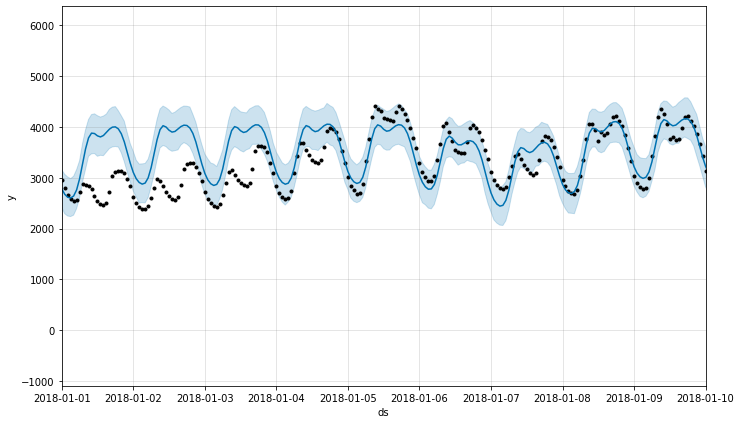

In [80]:
model.plot(forecast)
plt.xlim(dt(2018, 1, 1), dt(2018, 1, 10))
plt.show()

In [81]:
df_2020 = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2020.csv', encoding='shift-jis', skiprows=1)

In [83]:
df_2020

,DATE,TIME,実績(万kW)
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464
...,...,...,...
8779,2020/12/31,19:00,3746
8780,2020/12/31,20:00,3673
8781,2020/12/31,21:00,3560
8782,2020/12/31,22:00,3443


In [95]:
forecast[forecast['ds'] >= dt.(2020, 1, 1)]

SyntaxError: ignored

In [101]:
forecast_2020 = forecast[forecast['ds'] >= dt(2020, 1, 1)].reset_index(drop=True)

In [102]:
forecast_2020

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,3134.340011,2539.894238,3295.989848,3134.340011,3134.340011,-224.856836,-224.856836,-224.856836,-488.417802,-488.417802,-488.417802,108.739814,108.739814,108.739814,154.821152,154.821152,154.821152,0.0,0.0,0.0,2909.483175
1,2020-01-01 01:00:00,3134.297635,2396.321569,3168.257035,3134.297635,3134.297635,-354.546087,-354.546087,-354.546087,-617.309962,-617.309962,-617.309962,108.086395,108.086395,108.086395,154.677480,154.677480,154.677480,0.0,0.0,0.0,2779.751548
2,2020-01-01 02:00:00,3134.255259,2308.018634,3073.484313,3134.255259,3134.255259,-432.164816,-432.164816,-432.164816,-694.375983,-694.375983,-694.375983,107.671307,107.671307,107.671307,154.539860,154.539860,154.539860,0.0,0.0,0.0,2702.090443
3,2020-01-01 03:00:00,3134.212883,2267.798965,3066.675731,3134.212883,3134.212883,-466.064530,-466.064530,-466.064530,-727.960893,-727.960893,-727.960893,107.488055,107.488055,107.488055,154.408308,154.408308,154.408308,0.0,0.0,0.0,2668.148353
4,2020-01-01 04:00:00,3134.170507,2291.619002,3053.712187,3134.170507,3134.170507,-446.333967,-446.333967,-446.333967,-708.142983,-708.142983,-708.142983,107.526173,107.526173,107.526173,154.282843,154.282843,154.282843,0.0,0.0,0.0,2687.836539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,2762.320726,737.611010,5767.334388,193.670056,5101.766799,670.635253,670.635253,670.635253,396.227734,396.227734,396.227734,120.977144,120.977144,120.977144,153.430374,153.430374,153.430374,0.0,0.0,0.0,3432.955979
8780,2020-12-31 20:00:00,2762.278350,747.839044,5755.798402,193.349293,5102.237680,566.922395,566.922395,566.922395,292.169710,292.169710,292.169710,121.385983,121.385983,121.385983,153.366703,153.366703,153.366703,0.0,0.0,0.0,3329.200745
8781,2020-12-31 21:00:00,2762.235974,499.576849,5601.899701,193.028530,5102.708561,401.360681,401.360681,401.360681,126.182033,126.182033,126.182033,121.869350,121.869350,121.869350,153.309298,153.309298,153.309298,0.0,0.0,0.0,3163.596655
8782,2020-12-31 22:00:00,2762.193598,307.213397,5371.308935,192.707767,5103.179442,190.194424,190.194424,190.194424,-85.475310,-85.475310,-85.475310,122.411558,122.411558,122.411558,153.258175,153.258175,153.258175,0.0,0.0,0.0,2952.388022


In [106]:
df_2020 = df_2020.rename(columns={'t': 'y'})
df_2020.head()

,DATE,TIME,y
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [104]:
forecast_2020['yhat']

0       2909.483175
1       2779.751548
2       2702.090443
3       2668.148353
4       2687.836539
           ...     
8779    3432.955979
8780    3329.200745
8781    3163.596655
8782    2952.388022
8783    2734.208687
Name: yhat, Length: 8784, dtype: float64

In [107]:
results = pd.DataFrame()

In [108]:
# 実測値
results['t'] = df_2020['y']

#予測値
results['y'] = forecast_2020['yhat']
results['diff'] = results['t'] - results['y']

results.head()

,t,y,diff
0,2857,2909.483175,-52.483175
1,2703,2779.751548,-76.751548
2,2602,2702.090443,-100.090443
3,2520,2668.148353,-148.148353
4,2464,2687.836539,-223.836539


In [110]:
import numpy as np

In [111]:
np.mean(abs((results['y'] - results['t']) / results['y'])*100)

11.602725141191982

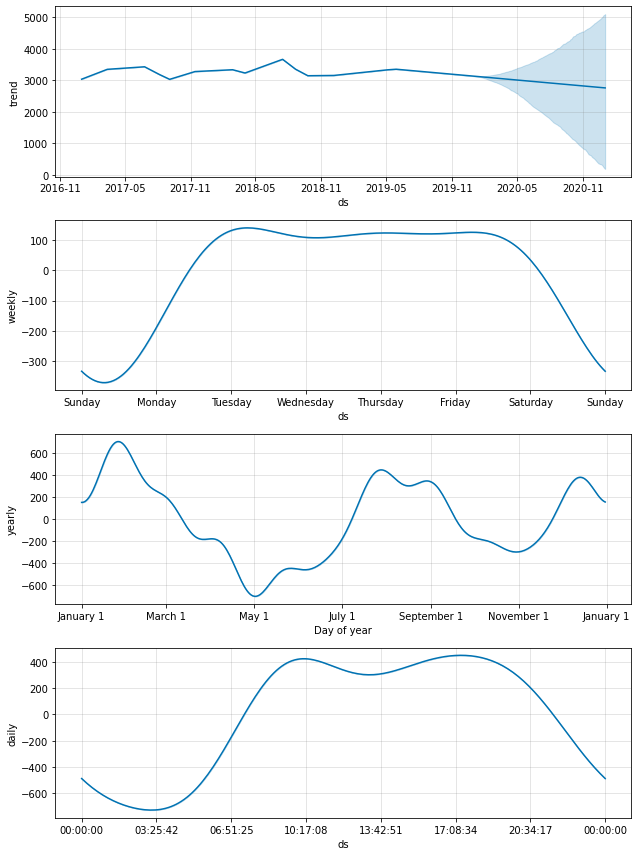

In [112]:
model.plot_components(forecast)
plt.show()